In [ ]:
# 1. Consider the  Table Contains the Average Annual Gold Rate from 1965 – 2022. Gold prices fluctuated throughout the year 2020 because of the COVID-19 epidemic. With gold functioning as a safe haven for investors, demand for the precious metal grew, and its price followed suit. During the epidemic, the stock market weakened, but it began to recover by the end of 2020 when the price of gold fell slightly.
# It’s crucial to remember that gold prices fluctuate during the year, and the figure below represents the average price for that year.
# With the exception of a few lows shared across a few years, The table shows that the gold price trend has always been upward, supporting the claim that gold is a secure investment over extended periods of time.
# Write a python program to find the fitted simple linear regression equation for the given data. 
# Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.


In [30]:
import numpy as np
data = pd.read_csv('gold_rate.csv')
data

,Year,Price (24 karat per 10 grams)
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438
5,2017,29667
6,2016,28623
7,2015,26343
8,2014,28006
9,2013,29600


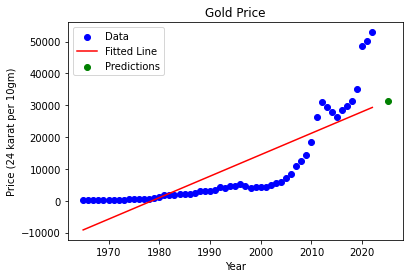

Slope: 675.3685748561934
Intercept: -1336276.8919068559
Predictions for new X: [31344.47217694]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

def calculate_coefficients(x, y):
    n = len(x)
    x_mean = sum(x) / n if n > 0 else 0
    y_mean = sum(y) / n if n > 0 else 0
    numerator = 0
    denominator = 1e-10
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

def calculate_errors(x, y, slope, intercept):
    y_pred = [slope * xi + intercept for xi in x]
    errors = [yi - y_pred[i] for i, yi in enumerate(y)]
    mse = sum([error ** 2 for error in errors]) / len(errors)
    rmse = mse ** 0.5
    return errors, mse, rmse

def predict_price(slope, intercept, year):
    return slope * year + intercept

data = pd.read_csv('gold_rate.csv')
x = data['Year'].values.reshape(-1, 1) 
y = data['Price (24 karat per 10 grams)']
years = list(data['Year'])
years_2d = [[year] for year in years]
model = LinearRegression()
model.fit(years_2d, y)

slope = model.coef_[0]
intercept = model.intercept_

new_X = np.array([2025]).reshape(-1, 1)
predictions = model.predict(new_X)

plt.scatter(x, y, color='blue', label='Data')  # Corrected x variable here
plt.plot(x, model.predict(x), color='red', label='Fitted Line')  # Corrected x variable here
plt.scatter(new_X, predictions, color='green', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Price (24 karat per 10gm)')
plt.title('Gold Price')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print("Predictions for new X:", predictions)



In [31]:
# Consider the Question no 1 gold price with following year-wise silver price. Write a python program to find the fitted multiple linear regression equation for the given data.  Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold and silver price with the year 2024 for 1 gram.

In [36]:
#question 2
# Read gold price data from the CSV file
gold_data = pd.read_csv("gold_rate.csv")
gold_years = gold_data["Year"].values
gold_prices = gold_data["Price (24 karat per 10 grams)"].values

# Read silver price data from the CSV file
silver_data = pd.read_csv("silver_rate.csv")
silver_years = silver_data["Year"].values
silver_prices = silver_data["Silver Rates in Rs./Kg."].values

# Merge the years and prices based on common years
common_years = np.intersect1d(gold_years, silver_years)
gold_prices = gold_prices[np.isin(gold_years, common_years)]
silver_prices = silver_prices[np.isin(silver_years, common_years)]

# Create a feature matrix with years and gold prices
feature_matrix = np.column_stack((common_years, gold_prices))

# Fitting the multiple linear regression model
regression_model = LinearRegression()
regression_model.fit(feature_matrix, silver_prices)

# Coefficients obtained from the regression model
coefficients = regression_model.coef_
intercept = regression_model.intercept_

print("Coefficients:")
print("Gold Coefficient:", coefficients[1])
print("Intercept:", intercept)

# Predict the gold price for the year 2024
predicted_gold_price_2024 = regression_model.predict([[2024, 1]])[0]

# Predict the silver price for the year 2024 using the predicted gold price
predicted_silver_price_2024 = regression_model.predict([[2024, predicted_gold_price_2024]])[0]

print("Predicted gold price for 2024:", predicted_gold_price_2024)
print("Predicted silver price for 2024:", predicted_silver_price_2024)

# Compare with sklearn model
sklearn_model = LinearRegression().fit(feature_matrix, silver_prices)
sklearn_predicted_prices_2024 = sklearn_model.predict([[2024, 1]])

print("\nSklearn Model Coefficients:")
print("Gold Coefficient:", sklearn_model.coef_[1])
print("Intercept:", sklearn_model.intercept_)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(silver_prices, regression_model.predict(feature_matrix))
rmse = np.sqrt(mse)

print("\nErrors:")
print("MSE:", mse)
print("RMSE:", rmse)

Coefficients:
Gold Coefficient: 0.85637093717818
Intercept: -4567529.956684878
Predicted gold price for 2024: 60094.42482186947
Predicted silver price for 2024: 111556.68735482078

Sklearn Model Coefficients:
Gold Coefficient: 0.85637093717818
Intercept: -4567529.956684878

Errors:
MSE: 56106934.24908668
RMSE: 7490.456211011895


In [22]:
silver_data = pd.read_csv('silver_rate.csv')
silver_data

,Year,Silver Rates in Rs./Kg.
0,1981,2715
1,1982,2720
2,1983,3105
3,1984,3570
4,1985,3955
5,1986,4015
6,1987,4794
7,1988,6066
8,1989,6755
9,1990,6463


In [37]:
# Write a python program for SGD by considering the year wise gold and silver price data. Compare the coefficients obtained from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram and gold and silver price with the year 2024 for 1 gram.

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
# Read gold price data from the CSV file
gold_data = pd.read_csv("gold_rate.csv")
gold_years = gold_data["Year"].values
gold_prices = gold_data["Price (24 karat per 10 grams)"].values

# Read silver price data from the CSV file
silver_data = pd.read_csv("silver_rate.csv")
silver_years = silver_data["Year"].values
silver_prices = silver_data["Silver Rates in Rs./Kg."].values

# Merge the years and prices based on common years
common_years = np.intersect1d(gold_years, silver_years)
gold_prices = gold_prices[np.isin(gold_years, common_years)]
silver_prices = silver_prices[np.isin(silver_years, common_years)]

# Create feature matrix with years and gold prices
feature_matrix = np.column_stack((common_years, gold_prices))

# Fitting the SGD regression model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(feature_matrix, silver_prices)

# Coefficients obtained from the regression model
coefficients = sgd_regressor.coef_
intercept = sgd_regressor.intercept_

print("Coefficients:")
print("Gold Coefficient:", coefficients[1])
print("Intercept:", intercept)

# Predict the gold price for the year 2025
predicted_gold_price_2025 = sgd_regressor.predict([[2025, 1]])[0]

# Predict the gold and silver prices for the year 2024
predicted_gold_price_2024 = sgd_regressor.predict([[2024, 1]])[0]
predicted_silver_price_2024 = sgd_regressor.predict([[2024, predicted_gold_price_2024]])[0]

print("Predicted gold price for 2025:", predicted_gold_price_2025)
print("Predicted gold price for 2024:", predicted_gold_price_2024)
print("Predicted silver price for 2024:", predicted_silver_price_2024)

# Compare with sklearn model
sklearn_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42).fit(feature_matrix, silver_prices)
sklearn_predicted_prices_2024 = sklearn_model.predict([[2024, 1]])

print("\nSklearn Model Coefficients:")
print("Gold Coefficient:", sklearn_model.coef_[1])
print("Intercept:", sklearn_model.intercept_)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(silver_prices, sgd_regressor.predict(feature_matrix))
rmse = np.sqrt(mse)

print("\nErrors:")
print("MSE:", mse)
print("RMSE:", rmse)


Coefficients:
Gold Coefficient: -30821232269599.887
Intercept: [1.94605458e+09]
Predicted gold price for 2025: 9308762044241596.0
Predicted gold price for 2024: 9304149905312974.0
Predicted silver price for 2024: -2.8676536530281763e+29

Sklearn Model Coefficients:
Gold Coefficient: -30821232269599.887
Intercept: [1.94605458e+09]

Errors:
MSE: 3.7510872306961784e+35
RMSE: 6.124612012769608e+17
